In [1]:
# 데이터 로드
kospi_df = pd.read_csv("kospi.csv")
kospi_df.tail(1)

,aq,cr,cv,dt,hv,lv,ncv,ov,rf,name
9999,1146495,-0.380228,-20,20190717,5350.0,5220.0,5240,5260.0,5,메리츠종금증권


#### 1. 모든 기업(name)이 포함되는 월별 상승률(cr)를 데이터 프레임으로 출력하고, 출력된 데이터 프레임을 리스트의 딕셔너리포멧으로 출력하세요.

In [2]:
# 모든 기업(name)이 포함되는 월별 상승률(cr)를 데이터 프레임으로 출력

In [3]:
kospi_df["month"] = kospi_df["dt"].apply(lambda data: "{}-{}".format(str(data)[:4], str(data)[4:6]))
result_df = kospi_df.groupby("month").mean()[["cr"]].reset_index()
result_df

,month,cr
0,2019-07,-0.304372
1,2019-08,-0.131933
2,2019-09,0.180889
3,2019-10,-0.003247
4,2019-11,0.040371
5,2019-12,0.083872


In [4]:
# 결과 데이터를 소수 셋째자리까지 출력되도록 아래와 같이 리스트의 딕셔너리 포멧으로 출력

In [5]:
result_df["cr"] = np.round(result_df["cr"], 3)
result_datas = result_df.to_dict("records")
result_datas

[{'month': '2019-07', 'cr': -0.304},
 {'month': '2019-08', 'cr': -0.132},
 {'month': '2019-09', 'cr': 0.181},
 {'month': '2019-10', 'cr': -0.003},
 {'month': '2019-11', 'cr': 0.04},
 {'month': '2019-12', 'cr': 0.084}]

#### 2. 2019년 11월 01일에서 2019년 12월 5일까지 일별 상승률 상위 5개 회사의 평균 상승율을 소수점 셋째 자리까지 출력하세요.

In [6]:
# 2019년 11월 30일에서 2019년 12월 5일까지 데이터 필터링
data = kospi_df[(kospi_df["dt"] >= 20191101) & (kospi_df["dt"] <= 20191205)]

# 날짜와 상승률 데이터로 내림차순한 후에 날짜, 회사이름, 상승률을 출력
data = data.sort_values(["dt","cr"], ascending=False)[["dt", "name", "cr"]]

# 날짜로 그룹핑하고 5개의 데이터만 선택
data = data.groupby("dt").head(5)

# 소수점 3째자리까지 출력
mean_cr = np.round(np.average(data["cr"]), 3)

mean_cr

3.573

#### 3. 전체 기간에서 평균 등락이 높은 3개의 회사와 평균 등락을 출력하세요. (cv: 등락)

In [7]:
# 회사명과 다른 데이터의 평균으로 그룹핑한후에 회사명과 등락만 출력
cr_df = kospi_df.groupby("name").agg("mean").reset_index()[["name", "cv"]]

# 등락을 내림차순으로 소팅
cr_df.sort_values("cv", ascending=False, inplace=True)

# 정수로 데이터 타입 변경
cr_df["cv"] = cr_df["cv"].astype("int")

# index 재정렬
cr_df.reset_index(drop=True, inplace=True)

# 딕셔너리 데이터 타입으로 3위까지 출력
result_dict = dict(zip(cr_df["name"][:3], cr_df["cv"][:3]))

result_dict

{'삼성바이오로직스': 945, 'NAVER': 545, '엔씨소프트': 400}

#### 4.  한진칼, 한국전력, 이마트회사의 종가(ncv) 데이터를 아래와 같이 정규화하여 그래프를 출력하세요.
- 정규화(Nomalization) 수식
- 데이터의 스케일이 0 ~ 1 사이의 값으로 변경됩니다.

$$y_i = \frac{x_i-min(x)}{max(x)-min(x)}$$

In [8]:
# 폰트 변경하는 방법
import matplotlib.font_manager as fm

font_location = "C:/Windows/fonts/Myungjo.ttf" # windows
font_location = "/Library/Fonts/AppleMyungjo.ttf" # mac 카탈리나 이전 버전
font_location = "/System/Library/Fonts/Supplemental/AppleMyungjo.ttf" # mac 카탈리나 버전

font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc("font", family=font_name)
mpl.rcParams["font.family"] # 현재 폰트 확인

['AppleMyungjo']

In [9]:
# 위에서 찾은 3개의 회사 데이터만 필터링
companies = ["한진칼", "한국전력", "이마트"]
datas = [kospi_df[kospi_df["name"] == company] for company in companies]
df = pd.concat(datas).reset_index(drop=True)[["name","ncv","dt"]]
df

,name,ncv,dt
0,한진칼,40050,20191210
1,한진칼,38800,20191209
2,한진칼,39450,20191206
3,한진칼,40050,20191205
4,한진칼,38700,20191204
...,...,...,...
295,이마트,127500,20190723
296,이마트,129000,20190722
297,이마트,129000,20190719
298,이마트,130000,20190718


In [10]:
# 정규화 함수 작성
def nomalization(df, company):
    datas = df[df["name"] == company]["ncv"]
    min_data, max_data = np.min(datas), np.max(datas)
    return (datas - min_data) / (max_data - min_data)

In [11]:
# 기업별 정규화한 데이터 컬럼 적용
df["nomal"] = 0
for company in companies:
    df.loc[df["name"] == company, "nomal"] = list(nomalization(df, company))
    
df

,name,ncv,dt,nomal
0,한진칼,40050,20191210,1.000000
1,한진칼,38800,20191209,0.911661
2,한진칼,39450,20191206,0.957597
3,한진칼,40050,20191205,1.000000
4,한진칼,38700,20191204,0.904594
...,...,...,...,...
295,이마트,127500,20190723,0.733333
296,이마트,129000,20190722,0.783333
297,이마트,129000,20190719,0.783333
298,이마트,130000,20190718,0.816667


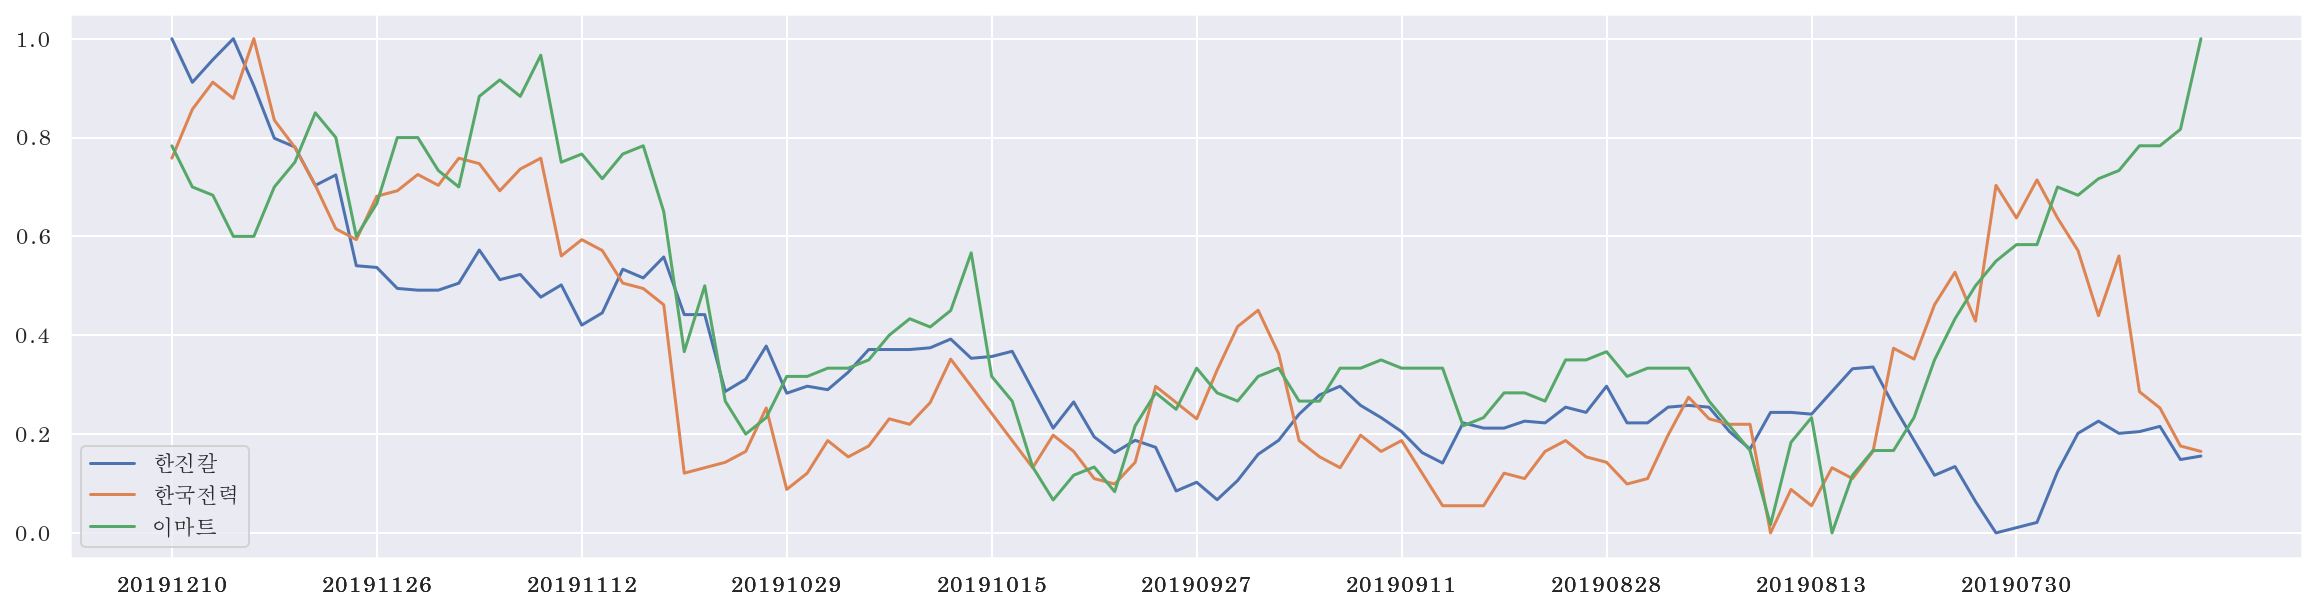

In [12]:
# 기업별 정규화한 값으로 그래프 그리기
plt.figure(figsize=(20, 5))

df["dt"] = df["dt"].astype("str")

for company in companies:
    
    x_data = df[df["name"] == company]["dt"]
    y_data = df[df["name"] == company]["nomal"]
    
    step = len(x_data) // 10
    
    plt.plot(x_data, y_data, label=company)
    plt.xticks(df[::step]["dt"])
    plt.legend()
    
plt.show()

#### 5. 아래와 같이 기업별 상관계수를 출력하세요.

In [13]:
companies = ["한진칼", "한국전력", "이마트"]
datas = [kospi_df[kospi_df["name"] == company] for company in companies]
df = pd.concat(datas).reset_index(drop=True)[["name","ncv","dt"]]
pivot_df = df.pivot("dt", "name", "ncv")
pivot_df.columns.name = ""
result_df = pivot_df.corr()
result_df

,이마트,한국전력,한진칼
,,,
이마트,1.000000,0.746616,0.495437
한국전력,0.746616,1.000000,0.620701
한진칼,0.495437,0.620701,1.000000
